In [1]:
import pandas as pd
import numpy as np
boston = pd.read_csv("./Downloads/boston.csv.bz2", sep="\t")

### Boston Housing Data

In [2]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2 Linear Regression

2.1 Let's apply linear regression to analyze the relationship between the house value and the average number of rooms.

In [7]:
import statsmodels.formula.api as smf
m = smf.ols(formula='medv ~ rm', data=boston).fit()
m.params

Intercept   -34.670621
rm            9.102109
dtype: float64

The intercept (beta 0) means that, if the average number of rooms is 0, the median value for that house is $-34.67 in $1000, which is not statistically significant as there are no houses with 0 rooms nor houses that are sold for a negative amount.

The slope (beta 1) means that, if the average number of rooms (rm) increases by 1, the median value for such a house increases by $9.1 in $1000s. It is statistically significant as it defines the slope for the linear regression curve.

Text(0, 0.5, 'Median value of homes (in $1000s)')

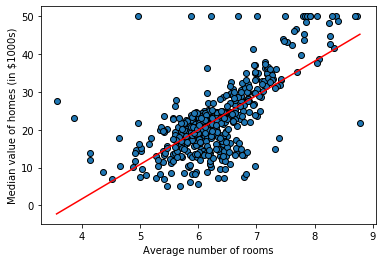

In [41]:
# Let's create a plot of medv x rm
import matplotlib.pyplot as plt
x = np.linspace(boston.rm.min(), boston.rm.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(boston.rm, boston.medv, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of homes (in $1000s)')

The line is upward sloping (which we already knew as we got a positive value for our beta 1, which is the slope of our line).

There is a similar relationship with the dots. Despite a few outliers, most houses average around 6 rooms and cost from $10,000 to about $22,000. This is not a very accurate information, of course, as I am basing these assumptions purely on the observation of the plot above. What is clear, though, is that there is a positive correlation between average the number of rooms of a house and its median value.

Now let's do the same analysis for a few more variables!

(a) nox

Text(0, 0.5, 'Median value of homes (in $1000s)')

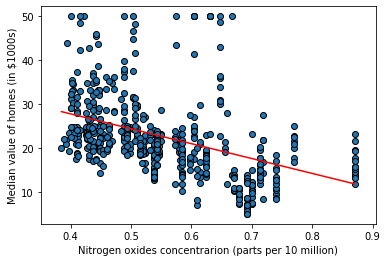

In [45]:
# Let's create a plot of medv x nox
import matplotlib.pyplot as plt
m = smf.ols(formula='medv ~ nox', data=boston).fit()
x = np.linspace(boston.nox.min(), boston.nox.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(boston.nox, boston.medv, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Nitrogen oxides concentrarion (parts per 10 million)')
plt.ylabel('Median value of homes (in $1000s)')

Downward sloping line, so a negative correlation between nitrogen oxides concentrarion and the median vlaue of houses. Most houses have a nitrogen oxides concentrarion ranging from 0.4 to 0.6.

(b) lstat

Text(0, 0.5, 'Median value of homes (in $1000s)')

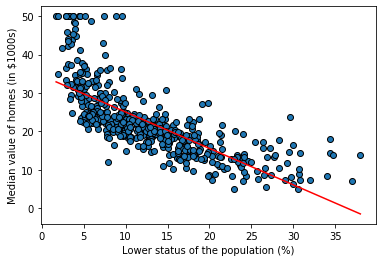

In [46]:
# Let's create a plot of medv x lstat
import matplotlib.pyplot as plt
m = smf.ols(formula='medv ~ lstat', data=boston).fit()
x = np.linspace(boston.lstat.min(), boston.lstat.max())
y_hat = m.params[0] + m.params[1]*x
plt.scatter(boston.lstat, boston.medv, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Lower status of the population (%)')
plt.ylabel('Median value of homes (in $1000s)')

Downward sloping line, so a negative correlation between the lower status of the population and the median vlaue of houses. Most houses are among 5% to about 17% of the lower status of the population.

(c) age

Text(0, 0.5, 'Median value of homes (in $1000s)')

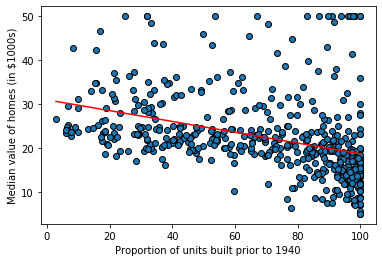

In [47]:
# Let's create a plot of medv x age
import matplotlib.pyplot as plt
m = smf.ols(formula='medv ~ age', data=boston).fit()
x = np.linspace(boston.age.min(), boston.age.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(boston.age, boston.medv, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Proportion of units built prior to 1940')
plt.ylabel('Median value of homes (in $1000s)')

Downward sloping line, so a negative correlation between the proportion of units built prior to 1940 and the median vlaue of houses. That is, according to our data, the more houses we have that were built prior to 1940, the lower the median values of homes we have. 

Besides, we can notice a large concentrarion of houses ranging from 90 to 100 in proportion of units built prior to 1940. 

In addition, the average median value of homes is, for our data, around $20,000.

(d) indus

Text(0, 0.5, 'Median value of homes (in $1000s)')

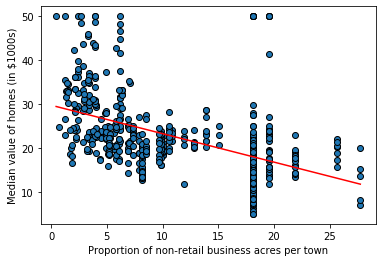

In [49]:
# Let's create a plot of medv x indus
import matplotlib.pyplot as plt
m = smf.ols(formula='medv ~ indus', data=boston).fit()
x = np.linspace(boston.indus.min(), boston.indus.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(boston.indus, boston.medv, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Median value of homes (in $1000s)')

Downward sloping line, so a negative correlation between the proportion of non-retail business acres per town and the median vlaue of houses.

Most points in our plot are have a range on the proportion of non-retail business acres per town category ranging from about 2 to 10, with their median value of homes ranging mostly from $20,000 to $40,000. 

It is hard to assume that this variable has such a great impact on the final price of homes.